# Consider the following CSV file "Concrete_Data.csv'' containing the results of compressive tests for various types of concrete.

1. Load the CSV data into a pandas data frame. Print some high-level statistical info about the data frame's columns.
​
2. How many rows have a compressive strength > 40 MPa?
​
3. Plot the histogram of Coarse Aggregate and Fine Aggregate values
​
4. Make a plot comparing compressive strength to age
​
5. Make a plot comparing compressive strength to age for only those rows with < 750 fine aggregate.
​
6. Try to build a linear model that predicts compressive strength given the other available fields.
​
7. Generate predictions for all the observations and a scatterplot comparing the predicted compressive strengths to the actual values.

In [1]:
# @Author:Linsen Li
# @Date:09/07/2019
# @mail:lli69@stevens.edu

In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

# this trick is required to get plots to display inline with the rest of your notebook,
# not in a separate window
%matplotlib inline

# just some stylistic tweaks in seaborn
sns.set(style='ticks', palette='Set2')

# 1. Load the CSV data into a pandas data frame. Print some high-level statistical info about the data frame's columns. ​

In [4]:
# Load the csv file to the dataframe and define the name of dataframe as df
# the csv file should have the same dictionary as this ipynb file
df = pd.read_csv('Concrete_Data.csv') 

In [64]:
df.shape # the dataframe has 1030 rows and 9 columns 

(1030, 9)

In [5]:
df.head(3) # Have a brief look on the data

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [6]:
df.describe() # Get the statistical summery for each column of the dataframe

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [7]:
df.describe()['Age']   # Get the specific columns statistical info,for instance, on the 'Age' column

count    1030.000000
mean       45.662136
std        63.169912
min         1.000000
25%         7.000000
50%        28.000000
75%        56.000000
max       365.000000
Name: Age, dtype: float64

In [8]:
df.info() # Get the basic information of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
Cement                           1030 non-null float64
Blast_Furnace_Slag               1030 non-null float64
Fly_Ash                          1030 non-null float64
Water                            1030 non-null float64
Superplasticizer                 1030 non-null float64
Coarse_Aggregate                 1030 non-null float64
Fine_Aggregate                   1030 non-null float64
Age                              1030 non-null int64
Concrete_Compressive_Strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


# 2. How many rows have a compressive strength > 40 MPa?

In [9]:
df.head(3)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [10]:
# I first get the dataframe whose compressive strength > 40 MPa
# Then I get the shape of this dataframe to get the row number
row_strength_above_40 = df[df['Concrete_Compressive_Strength'] > 40].shape[0]
print('There are '+str(row_strength_above_40)+' rows have a compressive strength > 40 MPa')

There are 379 rows have a compressive strength > 40 MPa


# 3. Plot the histogram of Coarse Aggregate and Fine Aggregate values 

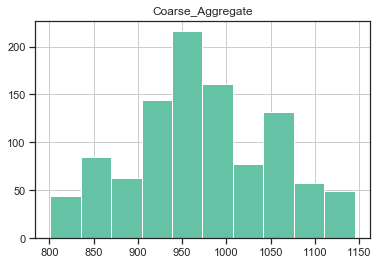

In [11]:
# I use the pandas hist function to draw the histogram
hist_Coarse = df.hist(['Coarse_Aggregate'])

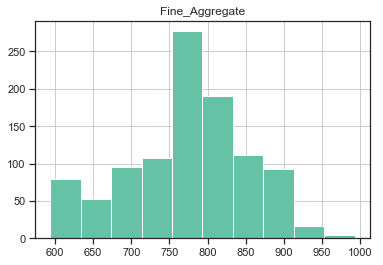

In [12]:
hist_Fine = df.hist('Fine_Aggregate')

# 4. Make a plot comparing compressive strength to age ​

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


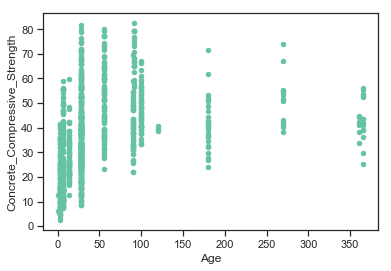

In [13]:
# Use the pandas plot function to draw the scatter plot
stren_to_age = df.plot(kind="scatter", y="Concrete_Compressive_Strength", x="Age")

# 5. Make a plot comparing compressive strength to age for only those rows with < 750 fine aggregate. 

In [14]:
df.head(3)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


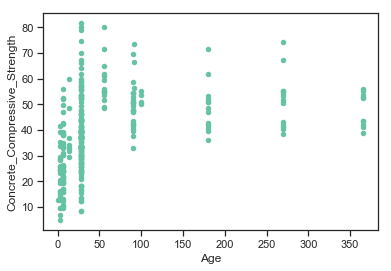

In [15]:
# I first receive the dataframe whose fine aggregate < 750
# then make a plot basing on this dataframe
df_fineAgg_below_750 = df[df['Fine_Aggregate'] < 750]
df_fineAgg_below_750.plot(kind = 'scatter',y="Concrete_Compressive_Strength", x="Age")

# 6. Try to build a linear model that predicts compressive strength given the other available fields. 

In [16]:
df.head(3)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27


In [17]:
# Load the linear model and create my linear model
from sklearn import linear_model 
my_linear = linear_model.Lasso(alpha=0.01)
# then define the features and target for the linear model
features = ['Cement','Blast_Furnace_Slag','Fly_Ash','Water','Superplasticizer',\
           'Coarse_Aggregate','Fine_Aggregate','Age']
target = "Concrete_Compressive_Strength"

# Eliminate any instances with missing values (NaNs) 
cleaned_df = df.dropna()

# Train the model on the data
my_linear.fit(cleaned_df[features], cleaned_df[target])
# Show the coefficients of the linear model
pd.DataFrame([dict(zip(features, my_linear.coef_))])

,Age,Blast_Furnace_Slag,Cement,Coarse_Aggregate,Fine_Aggregate,Fly_Ash,Superplasticizer,Water
0,0.114217,0.103846,0.119789,0.018048,0.020162,0.087924,0.29155,-0.150095


So we get the linear model: y ~ x1 + x2 + x3 + x4 + x5 + x6 + x7 + x8, the coff is the table above

In [19]:
# Get the predictions from the model
# after get the prediction column, assign it to previous table,named it as predictions_df
# compare the actual value and the predicted value 
preds = my_linear.predict(cleaned_df[features])
predictions_df = cleaned_df.assign(predictions=preds)
predictions_df[["Concrete_Compressive_Strength", "predictions"]].head(5)

,Concrete_Compressive_Strength,predictions
0,79.99,53.467849
1,61.89,53.738575
2,40.27,56.812597
3,41.05,67.663246
4,44.30,60.911899


# 7. Generate predictions for all the observations and a scatterplot comparing the predicted compressive strengths to the actual values.

In [20]:
# First to show the new dataframe with prediction 
predictions_df.head(3)

,Cement,Blast_Furnace_Slag,Fly_Ash,Water,Superplasticizer,Coarse_Aggregate,Fine_Aggregate,Age,Concrete_Compressive_Strength,predictions
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,53.467849
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,53.738575
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,56.812597


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


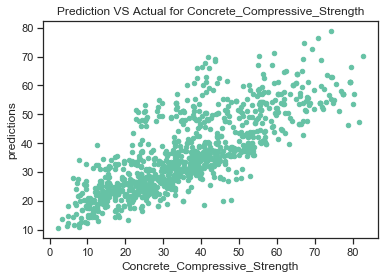

In [21]:
# Basing the new dataframe, draw the plot
pred_to_act = predictions_df.plot(kind = 'scatter',y = 'predictions',x = 'Concrete_Compressive_Strength',\
                   title = 'Prediction VS Actual for Concrete_Compressive_Strength')